<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/SbRcpW).**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [44]:
data = pd.read_csv("../data/titanic_train.csv", index_col="PassengerId")

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [45]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [5]:
data[(data["Embarked"] == "C") & (data['Fare'] > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [6]:
data[(data["Embarked"] == "C") & (data["Fare"] > 200)].sort_values(
    by="Fare", ascending=False
).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [9]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 'young'
    elif age > 60:
        return 'old'
    else:
        return 'unknown'

In [10]:
age_categories = [age_category(age) for age in data['Age']]

In [11]:
data["Age_category"] = age_categories

**Другой способ – через `apply`.**

In [12]:
data["Age_category"] = data["Age"].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [13]:
men = data[data['Sex'] == 'male']
women = data[data['Sex'] == 'female']
print(f'Мужчин: {men.shape[0]}, женщин: {women.shape[0]}')

Мужчин: 577, женщин: 314


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

Ответ: 108


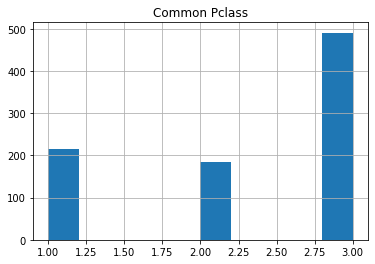

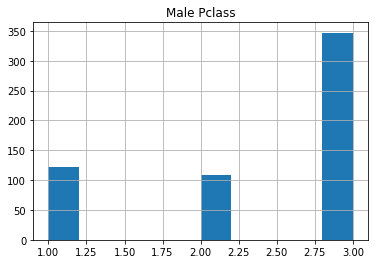

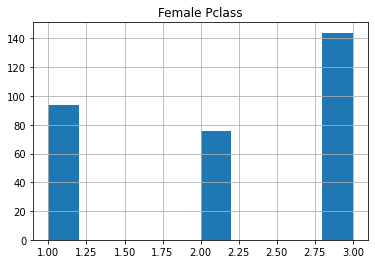

In [14]:
data.hist(column='Pclass');
plt.title('Common Pclass');

data[data['Sex'] == 'male'].hist(column='Pclass');
plt.title('Male Pclass');
print('Ответ:', data[(data['Sex'] == 'male') & (data['Pclass'] == 2)].shape[0])

data[data['Sex'] == 'female'].hist(column='Pclass');
plt.title('Female Pclass');

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [16]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data['Fare'].describe()
print('Ответ: 14.45; 49.69')

Ответ: 14.45; 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [18]:
young_alive = data[(data['Age_category'] == 'young') & (data['Survived'] == 1)].shape[0]
young_all = data[(data['Age_category'] == 'young')].shape[0]
young_ratio = young_alive / young_all

old_alive = data[(data['Age_category'] == 'old') & (data['Survived'] == 1)].shape[0]
old_all = data[(data['Age_category'] == 'old')].shape[0]
old_ratio = old_alive / old_all

print(f'Молодых выжило: {young_alive}, всего молодых: {young_all}, соотношение: {young_ratio}')
print(f'Старых выжило: {old_alive}, всего старых: {old_all}, соотношение: {old_ratio}')
print(f'Люди моложе 30 лет выживали чаще: {young_all > old_ratio}')

Молодых выжило: 156, всего молодых: 384, соотношение: 0.40625
Старых выжило: 5, всего старых: 22, соотношение: 0.22727272727272727
Люди моложе 30 лет выживали чаще: True


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [19]:
women_alive = data[(data['Sex'] == 'female') & (data['Survived'] == 1)].shape[0]
women_all = data[(data['Sex'] == 'female')].shape[0]
women_ratio = women_alive / women_all

men_alive = data[(data['Sex'] == 'male') & (data['Survived'] == 1)].shape[0]
men_all = data[(data['Sex'] == 'male')].shape[0]
men_ratio = men_alive / men_all

print(f'Женщин выжило: {women_alive}, всего женщин: {women_all}, соотношение: {women_ratio}')
print(f'Мужчин выжило: {men_alive}, всего женщин: {men_all}, соотношение: {men_ratio}')
print(f'Женщины выживали чаще мужчин: {women_ratio > men_ratio}')

Женщин выжило: 233, всего женщин: 314, соотношение: 0.7420382165605095
Мужчин выжило: 109, всего женщин: 577, соотношение: 0.18890814558058924
Женщины выживали чаще мужчин: True


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [20]:
def format_name(string):
    x = string.split(',')
    x = x[1:]
    return ' '.join(x)

In [25]:
short_names = data['Name'].apply(format_name)

max_name_freq = [0, 'name']
possible_names = ['Charles', 'Thomas', 'William', 'John']

for name in possible_names:
    name_freq = short_names[short_names.str.contains(name)].shape[0]
    if name_freq > max_name_freq[0]:
        max_name_freq[0] = name_freq
        max_name_freq[1] = name

print(f'Самое популярное имя: {max_name_freq[1]}')

Самое популярное имя: William


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

AxesSubplot(0.125,0.125;0.775x0.755)


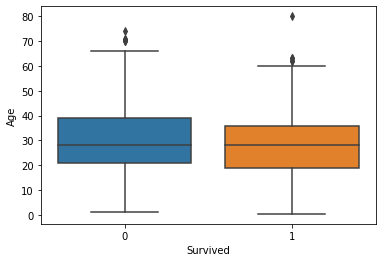

In [29]:
print(sns.boxplot(x = 'Survived', y = 'Age', data = data))
# Ответ: верно

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [36]:
print('В среднем мужчины 1-го класса старше 40 лет: ', data[(data['Pclass'] == 1) & (data['Sex'] == 'male')]['Age'].mean() > 40);
print('В среднем женщины 1-го класса старше 40 лет', data[(data['Pclass'] == 1) & (data['Sex'] == 'female')]['Age'].mean() > 40);
print('Мужчины всех классов в среднем старше женщин того же класса: ', data[(data['Sex'] == 'male')]['Age'].mean() > data[(data['Sex'] == 'female')]['Age'].mean())
print('В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса:', data[(data['Pclass'] == 1)]['Age'].mean() > data[(data['Pclass'] == 2)]['Age'].mean() > data[(data['Pclass'] == 3)]['Age'].mean());
print('Верны 1, 3 и 4 утверждения')

В среднем мужчины 1-го класса старше 40 лет:  True
В среднем женщины 1-го класса старше 40 лет False
Мужчины всех классов в среднем старше женщин того же класса:  True
В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса: True
Верны 1, 3 и 4 утверждения


***Все ответы правильные***